# Table of Contents
 <p><div class="lev1 toc-item"><a data-toc-modified-id="import-dadi-on-all-engines-1" href="#import-dadi-on-all-engines"><span class="toc-item-num">1&nbsp;&nbsp;</span>import dadi on all engines</a></div><div class="lev1 toc-item"><a data-toc-modified-id="load-1D-folded-spectra-2" href="#load-1D-folded-spectra"><span class="toc-item-num">2&nbsp;&nbsp;</span>load 1D folded spectra</a></div><div class="lev1 toc-item"><a data-toc-modified-id="define-range-of-initial-parameters-3" href="#define-range-of-initial-parameters"><span class="toc-item-num">3&nbsp;&nbsp;</span>define range of initial parameters</a></div><div class="lev1 toc-item"><a data-toc-modified-id="define-parallel-functions-4" href="#define-parallel-functions"><span class="toc-item-num">4&nbsp;&nbsp;</span>define parallel functions</a></div><div class="lev1 toc-item"><a data-toc-modified-id="run-optimisation-5" href="#run-optimisation"><span class="toc-item-num">5&nbsp;&nbsp;</span>run optimisation</a></div><div class="lev1 toc-item"><a data-toc-modified-id="check-convergence-6" href="#check-convergence"><span class="toc-item-num">6&nbsp;&nbsp;</span>check convergence</a></div><div class="lev2 toc-item"><a data-toc-modified-id="get-log-likelihood-values-61" href="#get-log-likelihood-values"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>get log likelihood values</a></div><div class="lev1 toc-item"><a data-toc-modified-id="residiual-plots-7" href="#residiual-plots"><span class="toc-item-num">7&nbsp;&nbsp;</span>residiual plots</a></div><div class="lev1 toc-item"><a data-toc-modified-id="PAR-8" href="#PAR"><span class="toc-item-num">8&nbsp;&nbsp;</span>PAR</a></div><div class="lev1 toc-item"><a data-toc-modified-id="What-is-the-maximal-reasonable-value-of-$T$?-9" href="#What-is-the-maximal-reasonable-value-of-$T$?"><span class="toc-item-num">9&nbsp;&nbsp;</span>What is the maximal reasonable value of <span style="color: inherit;" class="MathJax_Preview"></span><span role="presentation" data-mathml="<math xmlns=&quot;http://www.w3.org/1998/Math/MathML&quot;><mi>T</mi></math>" style="position: relative;" tabindex="0" id="MathJax-Element-11-Frame" class="MathJax"><nobr aria-hidden="true"><span style="width: 0.779em; display: inline-block;" role="math" id="MathJax-Span-38" class="math"><span style="display: inline-block; position: relative; width: 0.625em; height: 0px; font-size: 123%;"><span style="position: absolute; clip: rect(1.598em, 1000.63em, 2.439em, -1000em); top: -2.345em; left: 0em;"><span id="MathJax-Span-39" class="mrow"><span style="font-family: STIXMathJax_Main; font-style: italic;" id="MathJax-Span-40" class="mi">T<span style="display: inline-block; overflow: hidden; height: 1px; width: 0.077em;"></span></span></span><span style="display: inline-block; width: 0px; height: 2.345em;"></span></span></span><span style="display: inline-block; overflow: hidden; vertical-align: -0.038em; border-left: 0px solid; width: 0px; height: 0.88em;"></span></span></nobr><span role="presentation" class="MJX_Assistive_MathML"><math xmlns="http://www.w3.org/1998/Math/MathML"><mi>T</mi></math></span></span><script id="MathJax-Element-11" type="math/tex">T</script>?</a></div><div class="lev4 toc-item"><a data-toc-modified-id="Removing-starting-parameter-combinations-that-lead-to-extremely-long-running-times-9001" href="#Removing-starting-parameter-combinations-that-lead-to-extremely-long-running-times"><span class="toc-item-num">9.0.0.1&nbsp;&nbsp;</span>Removing starting parameter combinations that lead to extremely long running times</a></div>

I have started 11 IPython engines in the terminal with the following command:

`ipcluster start -n 11 &`

# import dadi on all engines

In [1]:
from ipyparallel import Client

cl = Client()

cl.ids

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [2]:
# clear the namespace in engines
cl.clear()

In [3]:
%px %who

[stdout:0] Interactive namespace is empty.
[stdout:1] Interactive namespace is empty.
[stdout:2] Interactive namespace is empty.
[stdout:3] Interactive namespace is empty.
[stdout:4] Interactive namespace is empty.
[stdout:5] Interactive namespace is empty.
[stdout:6] Interactive namespace is empty.
[stdout:7] Interactive namespace is empty.
[stdout:8] Interactive namespace is empty.
[stdout:9] Interactive namespace is empty.
[stdout:10] Interactive namespace is empty.


In [4]:
%%px --local

# run whole cell on all engines a well as in the local IPython session

import numpy as np

import sys

sys.path.insert(0, '/home/claudius/Downloads/dadi')

import dadi

# load 1D folded spectra

In [5]:
%%px --local

# import 1D spectrum of ery on all engines:
fs_ery = dadi.Spectrum.from_file('dadiExercises/ERY.FOLDED.sfs.dadi_format')

# import 1D spectrum of ery on all engines:
fs_par = dadi.Spectrum.from_file('dadiExercises/PAR.FOLDED.sfs.dadi_format')

In [7]:
fs_par

Spectrum([-- 8409.25697 12008.479728 5476.826032 3090.791731 2755.941992 1804.37826
 357.199759 2552.273719 832.442184 873.647652 0.001111 2420.101426 0.010094
 910.498821 0.725863 1506.959669 232.289352 523.880826 -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['par'])

In [6]:
%%px --local

ns = fs_ery.sample_sizes # both populations have the same sample size

fs_ery.pop_ids = ['ery']
fs_par.pop_ids = ['par']

# setting the smallest grid size slightly larger than the largest population sample size (36)
pts_l = [50, 60, 70]

# define range of initial parameters

In [7]:
%psource dadi.Demographics1D.two_epoch

The built-in _two epoch_ model defines a piecewise history, where at some time $T$ in the past the ancestral population instantaneously changed in size to the contemporary population size, which has ratio of $\nu$ to the ancestral population size.

Note, that $\nu$ and $T$ are confounded parameters, meaning that different combinations of $\nu$ and $T$ can lead to very similar site frequency spectra. For instance, a strong but recent bottleneck can produce a similar SFS to an ancient but weak bottleneck.

In [7]:
%%px --local

# create link to function that specifies a simple growth or decline model
func = dadi.Demographics1D.two_epoch

# create extrapolating version of the function
func_ex = dadi.Numerics.make_extrap_log_func(func)

# set lower and upper bounds to nu and T
upper_bound = [1e3, 4]
lower_bound = [1e-3, 1e-4]

In [8]:
# create range of starting values for nu and T, evenly distributed in log space
p0_nu = np.logspace(-3, 3, base=10.0, num=14)
p0_T = np.logspace(-4, np.log10(4), base=10, num=14)

In [9]:
print p0_nu[0], p0_nu[-1]
print p0_T[0], p0_T[-1]

0.001 1000.0
0.0001 4.0


Note, this also includes parameters at the boundaries I set above.

In [10]:
print "There are %d parameter combinations." % (14*14)

There are 196 parameter combinations.


In [11]:
%px %who

[stdout:0] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:1] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:2] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:3] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:4] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:5] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:6] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:7] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:8] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:9] 
dadi	 fs_ery	 fs_par	 func	 func_ex	 lower_bound	 np	 ns	 pts_l	 
sys	 upper_bound	 
[stdout:10] 
dadi	 fs_ery	 fs_

# define parallel functions

In [12]:
# create load balanced view of engines

lbview = cl.load_balanced_view()

In [13]:
%who

Client	 cl	 dadi	 fs_ery	 fs_par	 func	 func_ex	 lbview	 lower_bound	 
np	 ns	 p0_T	 p0_nu	 pts_l	 sys	 upper_bound	 


In [14]:
def run_dadi(p_init): # for the function to be called with map, it needs to have one input variable
    """
    p_init: initial parameter values to run optimisation from
    """
    if perturb == True:
        p_init = dadi.Misc.perturb_params(p_init, fold=fold, 
                                      upper_bound=upper_bound, lower_bound=lower_bound)
        # note upper_bound and lower_bound variables are expected to be in the namespace of each engine
    # run optimisation of paramters
    popt = dadi_opt_func(p0=p_init, data=sfs, model_func=func_ex, pts=pts_l, \
                                   lower_bound=lower_bound, upper_bound=upper_bound, \
                                   verbose=verbose, maxiter=maxiter, full_output=full_output)
    return popt

# run optimisation

In [15]:
from itertools import product

In [16]:
%%px

# set up global variables on engines required for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # uses gradient based BFGS algorithm
sfs = fs_ery # use ERY spectrum
perturb = False
fold = 1
maxiter = 10 # run a maximum of 10 iterations
verbose = 0
full_output = True # need to have full output to get the warnflags (see below)

In [17]:
%px who

[stdout:0] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:1] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:2] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:3] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:4] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:5] 
dadi	 dadi_opt_func	 fold	 fs_ery	 fs_par	 full_output	 func	 func_ex	 lower_bound	 
maxiter	 np	 ns	 perturb	 pts_l	 sfs	 sys	 upper_bound	 verbose	 

[stdout:6] 
dadi

In [31]:
# run optimnisations with all combinations of starting values

#ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [34]:
ar_ery.progress

196

There were 196 combinations of starting values.

In [35]:
ar_ery.ready()

True

In [36]:
ar_ery.wall_time

114.139403

In [25]:
from collections import defaultdict

In [38]:
warnflag = defaultdict(int)

for res in ar_ery:
    if res[6] == 1:
        warnflag[1] +=1
    elif res[6] == 2:
        warnflag[2] += 1
    elif res[6] == 0:
        warnflag[0] += 1
    else:
        warnflag[999] +=1

In [39]:
print "success", warnflag[0]
print "Maximum number of iterations exceeded.", warnflag[1]
print "Gradient and/or function calls not changing.", warnflag[2]
print "unknown flag", warnflag[999]

success 21
Maximum number of iterations exceeded. 28
Gradient and/or function calls not changing. 147
unknown flag 0


In [21]:
from scipy.optimize import fmin_bfgs

In [22]:
# this is the function that dadi calls

?fmin_bfgs

# the warnflag has index 6 in the returned array

Only 21 of the 196 starting parameter combinations lead to a successfull optimisation. I could increase that by 28 if I allowed enough iterations. However, I don't know what to do about the 147 combinations for which the gradient didn't change. Maybe they are in a very flat part of the likelihood surface?

In [45]:
from itertools import izip

In [48]:
for p_init, popt in izip(product(p0_nu, p0_T), ar_ery):
    if popt[6] == 0:
        print p_init, popt[0], popt[6]

(0.001, 0.030062999042780213) [ 0.001     0.030063] 0
(0.001, 0.067926137161718539) [ 0.001       0.06792614] 0
(0.001, 0.15347637483362347) [ 0.001       0.15347637] 0
(0.001, 0.34677369590428986) [ 0.001      0.3467737] 0
(0.001, 0.78352121817758968) [ 0.001       0.78352122] 0
(0.001, 1.770334678164093) [  1.00000000e-03   1.77033468e+00] 0
(0.0028942661247167516, 0.15347637483362347) [ 0.00289427  0.15347637] 0
(0.0028942661247167516, 0.34677369590428986) [ 0.00289427  0.3467737 ] 0
(0.0028942661247167516, 0.78352121817758968) [ 0.00289427  0.78352122] 0
(0.0028942661247167516, 1.770334678164093) [ 0.00289427  1.77033468] 0
(0.008376776400682925, 0.013305392433761934) [ 0.00172635  1.29841674] 0
(0.008376776400682925, 0.34677369590428986) [ 0.00837678  0.3467737 ] 0
(0.008376776400682925, 0.78352121817758968) [ 0.00837678  0.78352122] 0
(0.008376776400682925, 1.770334678164093) [ 0.00837678  1.77033468] 0
(0.024244620170823284, 0.030062999042780213) [ 0.01737541  0.80792208] 0
(0.0

Of the runs that did return an optimisation result, most just return the initial parameter values.

In [20]:
?dadi.Inference.optimize_lbfgsb

In [ ]:
?dadi.Inference.optimize_grid

In [21]:
?dadi.Inference.optimize_log

In [22]:
?dadi.Inference.optimize_log_fmin

In [24]:
?dadi.Inference.optimize_log_powell

[Scipy lecture notes on optimization](http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html)

I have decided to change to the Nelder-Mead optimisation algorithm.

In [25]:
%%px

# use Nelder-Mead algorithm
dadi_opt_func = dadi.Inference.optimize_log_fmin

In [72]:
# do same optimisation as above, but now with Nelder-Mead algorithm

#ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [82]:
ar_ery.progress

196

In [90]:
ar_ery.wall_time

577.460715

Note, that Nelder-Mead is much slower.

In [23]:
%psource dadi.Inference.optimize_log_fmin

In [ ]:
warnflag = defaultdict(int)

for res in ar_ery:
    if res[4] == 1:
        warnflag[1] +=1
    elif res[4] == 2:
        warnflag[2] += 1
    elif res[4] == 0:
        warnflag[0] += 1
    else:
        warnflag[999] +=1
        
print "success", warnflag[0]
print "Maximum number of function evaluations made.", warnflag[1]
print "Maximum number of iterations reached.", warnflag[2]
print "unknown flag", warnflag[999]

None of the runs reached convergence and returned a result.

In [91]:
cl[:]['maxiter']

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

`maxiter` still set to 10 on all engines.

In [92]:
%%px

# increase maximum number of iterations
maxiter = 100

In [93]:
# run optimisation as above, but now with up to 100 iterations per optimisation

#ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [97]:
ar_ery.progress

196

In [103]:
ar_ery.wall_time/60

17.11536005

This took 17 minutes to finish.

In [146]:
def get_flag_count(ar, NM=True)
    """
    ar: asyncresult object from BFGS or Nelder-Mead optimisation
    """
    if NM: # if ar from Nelder-Mead
        i = 4 # the warnflag is reported at index position 4 in the output array
    else: # ar from BFGS optimisation
        i = 6
    
    warnflag = defaultdict(int)

    for res in ar:
        if res[i] == 1:
            warnflag[1] +=1
        elif res[i] == 2:
            warnflag[2] += 1
        elif res[i] == 0:
            warnflag[0] += 1
        else:
            warnflag[999] +=1
    if NM:
        print "success", warnflag[0]
        print "Maximum number of function evaluations made.", warnflag[1]
        print "Maximum number of iterations reached.", warnflag[2]
        print "unknown flag", warnflag[999]
    else:
        print "success", warnflag[0]
        print "Maximum number of iterations exceeded.", warnflag[1]
        print "Gradient and/or function calls not changing.", warnflag[2]
        print "unknown flag", warnflag[999]

success 155
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 41
unknown flag 0


In [ ]:
get_flag_count(ar, NM=True)

This looks much better. I don't want to increase `maxiter` even more, due to the already long running time.

In [102]:
for p_init, popt in izip(product(p0_nu, p0_T), ar_ery):
    print p_init, popt[0], popt[4]

(0.001, 0.0001) [ 0.001   0.0001] 0
(0.001, 0.00022594597786155119) [ 0.0046087  0.0001   ] 0
(0.001, 0.00051051584911812533) [ 0.00460935  0.0001    ] 0
(0.001, 0.0011534900274281497) [ 0.0046101  0.0001   ] 0
(0.001, 0.002606264322008005) [ 0.0010587   0.01041429] 0
(0.001, 0.0058887494080177146) [ 0.00109955  0.01077432] 0
(0.001, 0.013305392433761934) [ 0.00114933  0.01121111] 0
(0.001, 0.030062999042780213) [ 0.00220919  0.02010065] 0
(0.001, 0.067926137161718539) [ 0.00561338  0.04580983] 0
(0.001, 0.15347637483362347) [ 0.00153996  0.14817624] 0
(0.001, 0.34677369590428986) [ 0.00152288  0.30668712] 0
(0.001, 0.78352121817758968) [ 0.00139997  0.78033341] 0
(0.001, 1.770334678164093) [  1.38237223e-03   1.77369523e+00] 0
(0.001, 4.0) [  1.00000000e-03   4.00000000e+00] 0
(0.0028942661247167516, 0.0001) [ 0.00460909  0.0001    ] 0
(0.0028942661247167516, 0.00022594597786155119) [ 0.00461009  0.0001    ] 0
(0.0028942661247167516, 0.00051051584911812533) [ 0.00460658  0.0001    ] 0

# check convergence

In [130]:
# get optimised parameters (if optimisation was successfull)
popt = [p[0] for p in ar_ery if p[4] == 0]
len(popt)

155

## get log likelihood values

In [26]:
# create parallel function with load balancing

@lbview.parallel(block=True)
def get_ll(p):
    """
    p: parameter combination
    
    First, calculates the best-fit model SFS given paramter combination p.
    Then returns the log likelihood of the expected SFS given the observed SFS.
    """
    expected_sfs = func_ex(p, ns, pts_l)
    return dadi.Inference.ll_multinom(expected_sfs, sfs)
    # expected_sfs does not need to be folded, ll_multinom does that automatically
    # make sure that sfs points to right spectrum

In [27]:
cl[0]['sfs']

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [155]:
ar_ery.get()

(array([ 0.001 ,  0.0001]), 3729.0988442929811, 52, 202, 0)

In [156]:
# get log likelihood values for all parameters returned

ll = get_ll.map([p[0] for p in ar_ery])

In [157]:
len(ll)

196

In [168]:
# get all starting parameter combinations, corresponding optimised parameters and log likelihood values
# if the optimisation was successful:

rows = [(p0[0], p0[1], xopt[0][0], xopt[0][1], logL) for p0, xopt, logL in izip(product(p0_nu, p0_T), ar_ery, ll) if xopt[4] == 0]

In [169]:
len(rows)

155

In [137]:
import pandas as pd

In [174]:
df = pd.DataFrame(data=rows, columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', 'logL'])

In [175]:
df.sort_values(by='logL', ascending=False)

,nu_0,T_0,nu_opt,T_opt,logL
119,41.246264,0.030063,0.004610,0.000100,-2041.093532
28,0.008377,0.000100,0.004610,0.000100,-2041.093532
59,0.070170,0.005889,0.004610,0.000100,-2041.093532
142,345.510729,0.153476,0.004610,0.000100,-2041.093532
102,4.923883,0.346774,0.004609,0.000100,-2041.093532
141,345.510729,0.067926,0.004609,0.000100,-2041.093532
56,0.070170,0.000511,0.004609,0.000100,-2041.093532
69,0.203092,0.013305,0.004610,0.000100,-2041.093532
44,0.024245,0.000511,0.004610,0.000100,-2041.093533
115,41.246264,0.001153,0.004610,0.000100,-2041.093533


Dadi wants to infer a very drastic bottleneck in the very recent past. It hits the lower bound on T that I set above. 

In [28]:
%%px

# further reduce lower bound on T (on all engines)

lower_bound = [1e-4, 1e-6]

In [29]:
# check maxiter setting on engines

cl[:]['maxiter']

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

In [30]:
cl[:]['lower_bound']

[[0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06]]

In [31]:
cl[:]['dadi_opt_func']

[<function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>,
 <function dadi.Inference.optimize_log_fmin>]

Still set to use Nelder-Mead algorithm.

In [32]:
cl[0]['sfs']

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

In [184]:
# rerun optimisation from above with reduced lower bound for T

#ar_ery = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [185]:
ar_ery.progress

196

In [192]:
ar_ery.wall_time/60

62.39776715

It took more than 1 hour to run this on 11 cores!

In [32]:
import dill

In [207]:
# save optimsiation results to file
with open("1D_two_epoch_opt_res_ERY.dill", "w") as fh:
    dill.dump(list(ar_ery.get()), fh) # unfortunately, dill cannot save the ar_ery object

In [189]:
get_flag_count(ar_ery)

success 145
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 51
unknown flag 0


The optimisations starting from 51 initial parameter combinations did not converge before the maximum number of iterations (100) was reached.

In [ ]:
# get log likelihood values for all parameters returned
ll = get_ll.map([p[0] for p in ar_ery])

In [ ]:
# create rows for dataframe
rows = [(p0[0], p0[1], xopt[0][0], xopt[0][1], logL) for p0, xopt, logL in izip(product(p0_nu, p0_T), ar_ery, ll) if xopt[4] == 0]

In [ ]:
# create dataframe
df = pd.DataFrame(data=rows, columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', 'logL'])

In [198]:
# look and see
df.sort_values(by='logL', ascending=False).head(40)

,nu_0,T_0,nu_opt,T_opt,logL
81,0.587802,0.153476,0.0001,0.000002,-2040.492673
86,1.701254,0.013305,0.0001,0.000002,-2040.492673
102,14.251027,0.000226,0.0001,0.000002,-2040.492673
95,4.923883,0.005889,0.0001,0.000002,-2040.492673
123,119.377664,0.005889,0.0001,0.000002,-2040.492673
58,0.070170,0.005889,0.0001,0.000002,-2040.492673
16,0.002894,0.000511,0.0001,0.000002,-2040.492673
76,0.587802,0.002606,0.0001,0.000002,-2040.492673
66,0.203092,0.002606,0.0001,0.000002,-2040.492673
132,345.510729,0.030063,0.0001,0.000002,-2040.492673


In [199]:
cl[0]['lower_bound']

[0.0001, 1e-06]

The optimisations with the highest likelihood are hitting the lower bound of parameter values that I've set. The time parameter $T$ that dadi infers with the highest likelihood is too low to make sense. It needs to be multiplied by $2N_{ref}$ to get the time in generations. With any reasonable effective ancient population size, this implies a very recent event. The event is inferred to be a very strong bottleneck. I don't think that these values can possibly make any sense. 

# residiual plots

In [222]:
p_opt = np.array( df.iloc[0, 2:4] )
p_opt

array([  1.00010340e-04,   2.16061780e-06])

In [223]:
# calculate the best-fit model SFS given the paramter combination with the highest likelihood
expected_sfs = func_ex(p_opt, ns, pts_l)
expected_sfs.fold()

Spectrum([-- 0.7545818109466478 0.4887066151704145 0.3548213941036278
 0.2788035583144265 0.23136799503938965 0.1995615141413847
 0.17706123031893858 0.1605073185422468 0.14798161545738503
 0.13832185896991653 0.13078894635825167 0.12489466723234886
 0.12030736601629187 0.11679777589049832 0.11420672212630598
 0.1124253640623551 0.11138301857255054 0.055519929554490866 -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=None)

[  1.00010340e-04   2.16061780e-06]


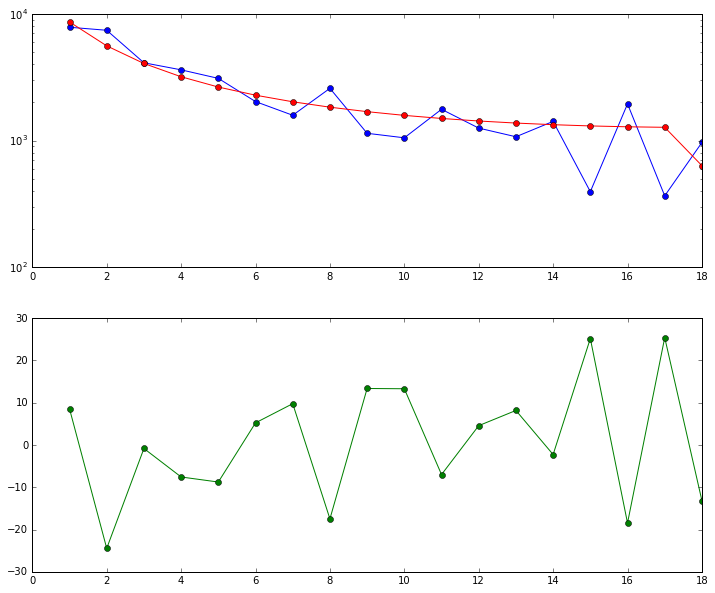

In [226]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [12.0, 10.0]
print(p_opt)
dadi.Plotting.plot_1d_comp_multinom(expected_sfs.fold()[:19], fs_ery[:19], residual='linear')

Does this model provide a better fit than a standard neutral model?

In [227]:
# create link to function that specifies a standard neutral model
snm = dadi.Demographics1D.snm
# make extrapolating function
snm_ex = dadi.Numerics.make_extrap_log_func(snm)

In [228]:
?snm

In [238]:
# calculate the best-fit model SFS given paramter combination
expected_sfs = snm_ex(0, ns, pts_l)
# calculate the log likelihood of the expected SFS given the observed SFS
# no need to fold the model, is done automatically if data is folded
dadi.Inference.ll_multinom(expected_sfs, fs_ery)

-2460.8445858070236

In [239]:
# calculate the best-fit model SFS given paramter combination
expected_sfs = func_ex(p_opt, ns, pts_l)
# calculate the log likelihood of the expected SFS given the observed SFS
# no need to fold the model, is done automatically if data is folded
dadi.Inference.ll_multinom(expected_sfs, fs_ery)

-2040.4926752518243

Compared to a standard neutral model, the two epoch model with the best fitting parameter values does provide a much better fit to the data spectrum. However, it also requires two (instead of zero) parameters and the inferred parameter values cannot be trusted since they are hitting the boundary of sensible values.

In [193]:
%%px

dadi_opt_func = dadi.Inference.optimize_log # BFGS

In [195]:
ar_ery_BFGS = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [200]:
ar_ery_BFGS.progress

196

In [203]:
get_flag_count(ar_ery_BFGS, NM=False)

success 27
Maximum number of iterations exceeded. 0
Gradient and/or function calls not changing. 169
unknown flag 0


Clearly, the BFGS algorithm cannot be used for this problem. It is not limited by the maximum number of iterations, but by the lack of a gradient in the likelihood function.

# PAR

In [209]:
%%px

# set up global variables on engines requires for run_dadi function call

dadi_opt_func = dadi.Inference.optimize_log # BFGS
sfs = fs_par # use spectrum from PAR in optimisation
perturb = False
fold = 1
maxiter = 10 # keep it low for now
verbose = 0
full_output = True

In [208]:
# create range of starting values for nu and T, evenly distributed in log space
p0_nu = np.logspace(-3, 3, base=10.0, num=10)
p0_T = np.logspace(-4, np.log10(4), base=10, num=10)

In [210]:
ar_par_BFGS = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [213]:
ar_par_BFGS.progress

100

In [214]:
get_flag_count(ar_par_BFGS, NM=False)

success 14
Maximum number of iterations exceeded. 19
Gradient and/or function calls not changing. 67
unknown flag 0


Again, the BFGS algorithm cannot be used. The majority of initial parameter combinations don't converge because of a lack of gradient in the likelihood surface.

In [215]:
%%px

dadi_opt_func = dadi.Inference.optimize_log_fmin # Nelder-Mead
maxiter = 100 # provide plenty of iterations

In [216]:
ar_par_NM = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [240]:
ar_par_NM.progress

100

In [241]:
ar_par_NM.elapsed/60

40.8876008

This took 40 minutes to complete. Most of the time running on one parameter combination. 

In [242]:
get_flag_count(ar_par_NM, NM=True)

success 98
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 2
unknown flag 0


In [244]:
with open("1D_two_epoch_opt_res_PAR.dill", "w") as fh:
    dill.dump(list(ar_par_NM.get()), fh)

Which initial parameter combination did not converge, i. e. for which did the maximum number of iterations (100) not suffice? These are also likely to be the ones that have run so long.

In [248]:
for p0, xopt in izip(product(p0_nu, p0_T), ar_par_NM):
    if xopt[4] == 2:
        print p0

(2.154434690031882, 0.0034199518933533931)
(1000.0, 0.011100946155696227)


In [ ]:
# get log likelihood values for all parameters returned
ll = get_ll.map([p[0] for p in ar_par_NM])

In [249]:
# create rows for dataframe
rows = [(p0[0], p0[1], xopt[0][0], xopt[0][1], logL) for p0, xopt, logL in izip(product(p0_nu, p0_T), ar_par_NM, ll) if xopt[4] == 0]

In [251]:
df = pd.DataFrame(data=rows, columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', 'logL'])

In [252]:
df.sort_values(by='logL', ascending=False)

,nu_0,T_0,nu_opt,T_opt,logL
78,46.415888,4.000000,5.541314,4.000000,-8435.706819
68,10.000000,4.000000,5.541188,3.999998,-8435.706834
55,2.154435,0.116961,5.541445,3.999994,-8435.706838
66,10.000000,0.379647,5.542152,3.999999,-8435.706844
88,215.443469,4.000000,5.541140,3.999994,-8435.706852
86,215.443469,0.379647,5.541279,3.999991,-8435.706857
57,2.154435,1.232310,5.541516,3.999990,-8435.706858
87,215.443469,1.232310,5.541448,3.999988,-8435.706864
77,46.415888,1.232310,5.540994,3.999992,-8435.706878
58,2.154435,4.000000,5.541669,3.999985,-8435.706880


The optimal parameter combination returned is hitting the upper parameter bound that I set. 

In [253]:
cl[0]['upper_bound']

[1000.0, 4]

In [255]:
%%px

upper_bound = [1e3, 5]

In [256]:
ar_par_NM = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [276]:
ar_par_NM.progress

100

In [277]:
get_flag_count(ar_par_NM, NM=True)

success 98
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 2
unknown flag 0


In [278]:
for r in ar_par_NM:
    if r[4] == 2:
        print r[0]

[  1.42092098e-04   1.00001372e-06]
[  1.42128126e-04   1.00003804e-06]


In [305]:
x  = [(p0, xopt[0], m['completed'] - m['started']) for p0, xopt, m in izip(product(p0_nu, p0_T), ar_par_NM, ar_par_NM.metadata)]
y = sorted(x, key=lambda x: x[2])
for p in y:
    print "nu_0 = %.6f, T_0 = %.6f \t nu = %.6f, T = %.6f" % (p[0][0], p[0][1], p[1][0], p[1][1]), "\t", p[2]

nu_0 = 1000.000000, T_0 = 0.003420 	 nu = 337.016302, T = 0.000001 	0:00:01.253315
nu_0 = 215.443469, T_0 = 0.003420 	 nu = 300.605096, T = 0.000001 	0:00:01.337191
nu_0 = 215.443469, T_0 = 0.001054 	 nu = 637.204074, T = 0.000001 	0:00:01.406946
nu_0 = 10.000000, T_0 = 4.000000 	 nu = 6.607394, T = 4.999988 	0:00:01.608731
nu_0 = 0.100000, T_0 = 0.001054 	 nu = 0.000117, T = 0.000001 	0:00:01.870468
nu_0 = 215.443469, T_0 = 0.011101 	 nu = 0.000142, T = 0.000001 	0:00:01.964483
nu_0 = 1000.000000, T_0 = 0.000100 	 nu = 0.000142, T = 0.000001 	0:00:01.998725
nu_0 = 0.021544, T_0 = 0.000325 	 nu = 0.000142, T = 0.000001 	0:00:02.077759
nu_0 = 1000.000000, T_0 = 0.036033 	 nu = 0.000142, T = 0.000001 	0:00:02.078339
nu_0 = 10.000000, T_0 = 0.011101 	 nu = 0.000142, T = 0.000001 	0:00:02.104663
nu_0 = 46.415888, T_0 = 0.011101 	 nu = 0.000142, T = 0.000001 	0:00:02.125874
nu_0 = 0.021544, T_0 = 0.001054 	 nu = 0.000142, T = 0.000001 	0:00:02.170370
nu_0 = 10.000000, T_0 = 0.036033 	 nu = 

This has printed out the initial parameter combinations, the final parameter values and the processing for each combination. There were two jobs that have taken a very long time to complete. Note, that these are not the ones which have exceeded maxiter (see above). Neither of the two long lasting jobs is hitting the boundaries of the parameter space that can be searched.

In [294]:
cl[:]['upper_bound']

[[1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5],
 [1000.0, 5]]

In [295]:
cl[:]['lower_bound']

[[0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06],
 [0.0001, 1e-06]]

In [296]:
# get log likelihood values for all parameters returned
ll = get_ll.map([p[0] for p in ar_par_NM])

In [297]:
# create rows for dataframe, without the parameter values on non-convergent runs
rows = [(p0[0], p0[1], xopt[0][0], xopt[0][1], logL) for p0, xopt, logL in izip(product(p0_nu, p0_T), ar_par_NM, ll) if xopt[4] == 0]

In [298]:
df = pd.DataFrame(data=rows, columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', 'logL'])

In [299]:
df.sort_values(by='logL', ascending=False)

,nu_0,T_0,nu_opt,T_opt,logL
47,0.464159,0.379647,6.607515,4.999997,-8432.350812
55,2.154435,0.116961,6.607484,4.999997,-8432.350814
87,215.443469,1.232310,6.607281,4.999999,-8432.350814
95,1000.000000,0.379647,6.607693,4.999995,-8432.350817
77,46.415888,1.232310,6.607869,4.999995,-8432.350821
56,2.154435,0.379647,6.608082,4.999998,-8432.350821
76,46.415888,0.379647,6.607876,4.999993,-8432.350826
86,215.443469,0.379647,6.608089,4.999993,-8432.350835
67,10.000000,1.232310,6.608133,4.999993,-8432.350836
68,10.000000,4.000000,6.607394,4.999988,-8432.350839


# What is the maximal reasonable value of $T$?

The most likely parameter combinations are hitting the upper parameter bound for the time parameter again. I am not sure whether an even higher $T$ can reasonably be assumed.

The expected time to the most recent common ancestor (MRCA) in a neutral genealogy is:

$$
E\big[T_{MRCA}\big] = 2 \Big(1-\frac{1}{n}\Big)
$$

measured in $2N_e$ generations. Note, that $T_{MRCA}$ is close to its large sample size limit of 2 already for moderate sample sizes.

In [37]:
# the above formula for the sample sizes here yields:
2 * (1-1.0/ns[0])

1.9444444444444444

See figure 3.4, p. 79, in Wakeley2009 for the distribution of the $T_{MRCA}$. For $n=36$ it has a mode close 1.2 and an expected value of 1.94. Values for $T_{MRCA}$ greater than 4 are very unlikely given a standard coalescent model, but may be more likely under models including population expansion or gene flow from another population.

In [45]:
%%px

upper_bound = [1e3, 9]

In [320]:
cl[0]['upper_bound']

[1000.0, 9]

In [321]:
cl[0]['lower_bound']

[0.0001, 1e-06]

In [310]:
ar_par_NM = lbview.map(run_dadi, product(p0_nu, p0_T), block=False, order=True)

In [311]:
ar_par_NM.progress

98

In [312]:
get_flag_count(ar_par_NM, NM=True)

success 98
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 2
unknown flag 0


#### Removing starting parameter combinations that lead to extremely long running times

In [322]:
for p0, r in izip(product(p0_nu, p0_T), ar_par_NM):
    if r[4] == 2: # if run hit maxiter limit
        print p0, r[0]

(2.154434690031882, 0.0034199518933533931) [  1.42092098e-04   1.00001372e-06]
(1000.0, 0.011100946155696227) [  1.42128126e-04   1.00003804e-06]


In [326]:
x  = [(p0, xopt[0], m['completed'] - m['started']) for p0, xopt, m in izip(product(p0_nu, p0_T), ar_par_NM, ar_par_NM.metadata)]
y = sorted(x, key=lambda x: x[2], reverse=True)

for i, p in enumerate(y):
    if i > 1: break
    print "nu_0 = %.6f, T_0 = %.6f \t nu = %.6f, T = %.6f" % (p[0][0], p[0][1], p[1][0], p[1][1]), "\t", p[2]

nu_0 = 0.021544, T_0 = 0.036033 	 nu = 0.000392, T = 1.338353 	0:40:26.477521
nu_0 = 0.001000, T_0 = 4.000000 	 nu = 0.001044, T = 4.195350 	0:36:49.002706


I want to get these starting values out, since they take too long to complete.

In [335]:
excl = [ex[0] for ex in y[:2]]
excl[0] == excl[0]

True

In [342]:
combs = [comb for comb in product(p0_nu, p0_T) if not (comb == excl[0] or comb == excl[1])]
print excl[1] in combs
print excl[0] in combs
print combs[22] in combs

False
False
True


Ok, I think the new parameter array does not include the sets that lead to such extreme running times.

In [343]:
ar_par_NM = lbview.map(run_dadi, combs, block=False, order=True)

In [347]:
ar_par_NM.progress

98

In [349]:
ar_par_NM.elapsed/60

11.455080816666667

11 instead of 40 minutes.

In [348]:
get_flag_count(ar_par_NM, NM=True)

success 96
Maximum number of function evaluations made. 0
Maximum number of iterations reached. 2
unknown flag 0


In [350]:
# get log likelihood values for all parameters returned
ll = get_ll.map([p[0] for p in ar_par_NM])

In [351]:
# create rows for dataframe, without the parameter values on non-convergent runs
rows = [(p0[0], p0[1], xopt[0][0], xopt[0][1], logL) for p0, xopt, logL in izip(product(p0_nu, p0_T), ar_par_NM, ll) if xopt[4] == 0]

In [352]:
df = pd.DataFrame(data=rows, columns=['nu_0', 'T_0', 'nu_opt', 'T_opt', 'logL'])

In [353]:
df.sort_values(by='logL', ascending=False)

,nu_0,T_0,nu_opt,T_opt,logL
55,2.154435,0.116961,10.916014,8.999996,-8427.371011
74,46.415888,0.036033,10.916156,8.999985,-8427.371017
64,10.000000,0.036033,10.916202,8.999970,-8427.371027
65,10.000000,0.116961,10.916538,8.999964,-8427.371034
94,1000.000000,0.116961,10.915734,8.999962,-8427.371034
86,215.443469,0.379647,10.916784,8.999967,-8427.371038
95,1000.000000,0.379647,10.915593,8.999947,-8427.371046
45,0.464159,0.036033,10.915737,8.999939,-8427.371048
76,46.415888,0.379647,10.916366,8.999931,-8427.371052
53,2.154435,0.011101,10.915707,8.999904,-8427.371070


Still hitting the boundaries of $T$. Something does not work here.

I am not sure whether it is worth continuing.

Ryan Gutenkunst:

>This indicates that dadi is having trouble fitting your data. One possibility is that the history of the population includes important events that aren’t in your models. Another possibility is that your data is biased in ways that aren’t in your models. For example, maybe your missing calls for rare alleles.

[dadi forum thread on parameters hitting the boundary](https://groups.google.com/forum/#!searchin/dadi-user/boundary%7Csort:relevance/dadi-user/3g9M2Lwc84s/5qbzVry2AQAJ)

The data is clearly biased or at least very noisy. However, the models that only include a single event, one event of growth or decline, might also be too simplistic. So, I think before I go on and try to further clean the data, I should try the two remaining more complex 1D models that come with dadi: `bottlegrowth` and `three_epoch`. If I cannot reliably estimate parameter values for those models, then I think it is most likely a data issue.

In [34]:
?dadi.Demographics1D.bottlegrowth

In [35]:
?dadi.Demographics1D.three_epoch

These two models shall be analysed in separete notebooks.